<a href="https://colab.research.google.com/github/dharshini02/AI/blob/main/AirFoil_Self_Noise_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path="/content/drive/MyDrive/assign_linear/Book1.xlsx"
df=pd.read_excel(path)

In [4]:
df.head(5)

,800.000000,0.000000,0.304800,71.300000,0.002663,126.201000
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [5]:
print(df.shape)


(1502, 6)


In [6]:
df.columns=['Frequency','Angle of attack','Chord length','Free-stream velocity','Displacement thickness','Scaled sound pressure level']

In [7]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Displacement thickness,Scaled sound pressure level
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Frequency                    1502 non-null   int64  
 1   Angle of attack              1502 non-null   float64
 2   Chord length                 1502 non-null   float64
 3   Free-stream velocity         1502 non-null   float64
 4   Displacement thickness       1502 non-null   float64
 5   Scaled sound pressure level  1502 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [9]:
df.describe()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Displacement thickness,Scaled sound pressure level
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,2887.769640,6.786818,0.136436,50.847137,0.011146,124.835034
std,3153.162983,5.917509,0.093471,15.569029,0.013153,6.900864
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.190000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.000000,9.900000,0.228600,71.300000,0.015840,129.997750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [10]:
df.isnull().sum()

Frequency                      0
Angle of attack                0
Chord length                   0
Free-stream velocity           0
Displacement thickness         0
Scaled sound pressure level    0
dtype: int64

array([[<Axes: title={'center': 'Frequency'}>,
        <Axes: title={'center': 'Angle of attack'}>],
       [<Axes: title={'center': 'Chord length'}>,
        <Axes: title={'center': 'Free-stream velocity'}>],
       [<Axes: title={'center': 'Displacement thickness'}>,
        <Axes: title={'center': 'Scaled sound pressure level'}>]],
      dtype=object)

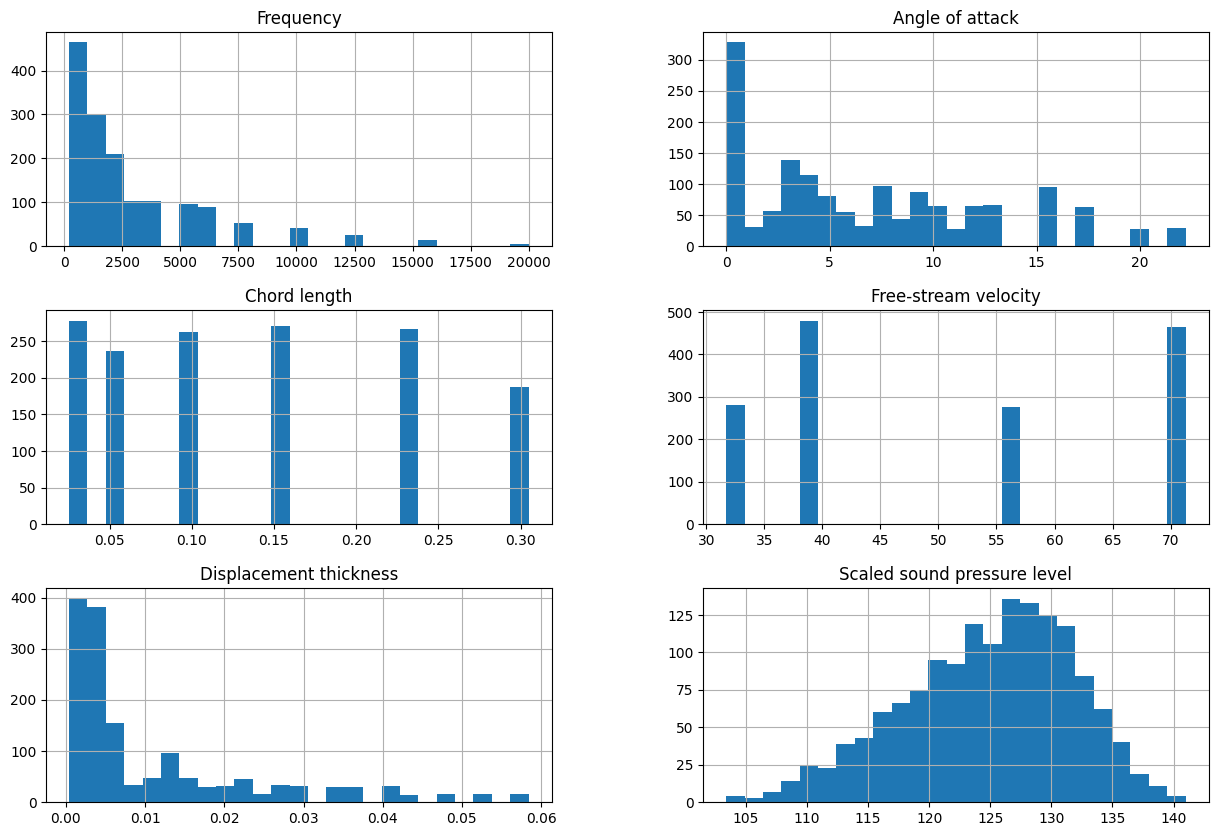

In [11]:
df.hist(bins=25,figsize=(15,10))



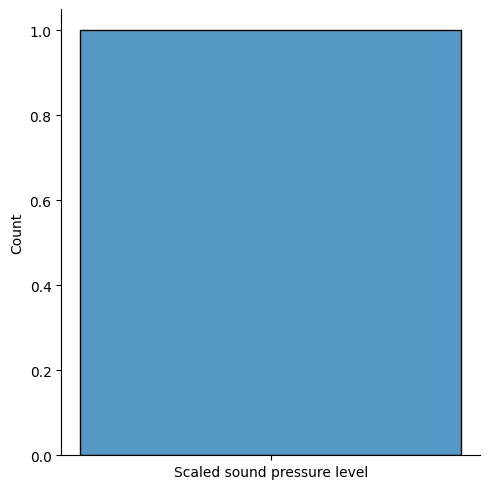

In [15]:
import seaborn as sns
sns.displot(['Scaled sound pressure level'])

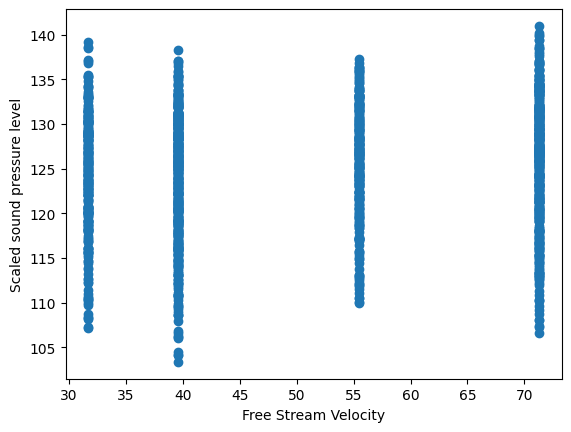

In [16]:
fig, ax=plt.subplots()
ax.scatter(x=df['Free-stream velocity'], y=df['Scaled sound pressure level'])
plt.xlabel('Free Stream Velocity')
plt.ylabel('Scaled sound pressure level')
plt.show()

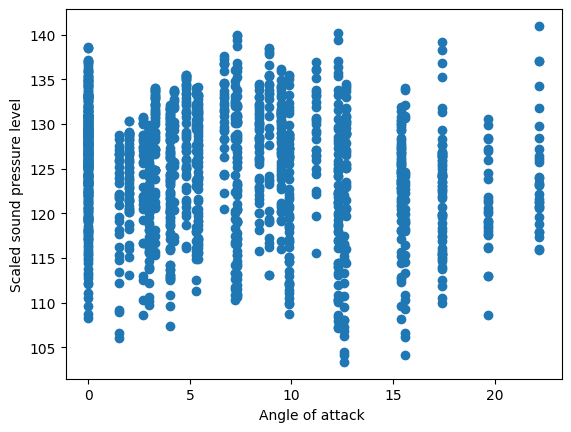

In [17]:
fig, ax=plt.subplots()
ax.scatter(x=df['Angle of attack'], y=df['Scaled sound pressure level'])
plt.xlabel('Angle of attack ')
plt.ylabel('Scaled sound pressure level')
plt.show()

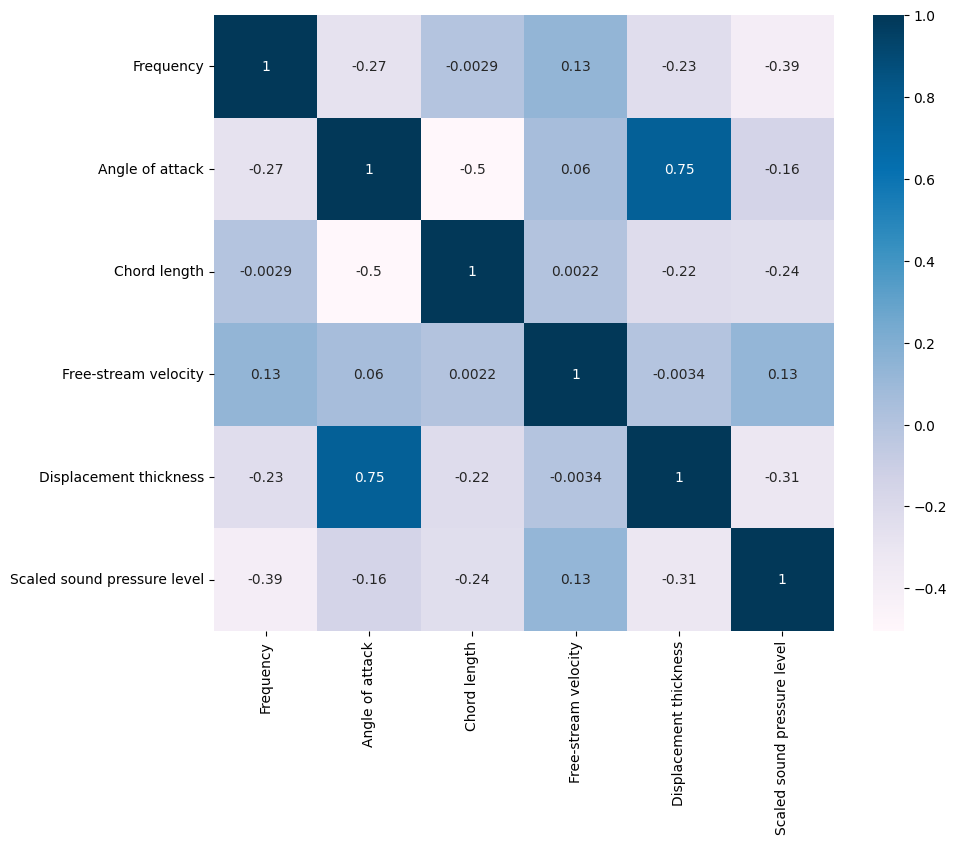

In [18]:
plt.figure(figsize=(10,8))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True,cmap=plt.cm.PuBu)
plt.show()


In [19]:
cor=abs(corr_matrix['Scaled sound pressure level'])
relevant_feature=cor[cor>0.2]
names=[index for index, values in relevant_feature.items()]
print(names)
print(len(names))

['Frequency', 'Chord length', 'Displacement thickness', 'Scaled sound pressure level']
4


In [20]:
corr_matrix["Scaled sound pressure level"].sort_values(ascending=False)

Scaled sound pressure level    1.000000
Free-stream velocity           0.125003
Angle of attack               -0.156027
Chord length                  -0.236657
Displacement thickness        -0.312632
Frequency                     -0.390686
Name: Scaled sound pressure level, dtype: float64

##Divide the Data

In [ ]:
X=df[['Frequency','Angle of attack','Chord length','Free-stream velocity','Displacement thickness']]
y=df['Scaled sound pressure level']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.1, random_state = 0)

##Model Development

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
prediction=lr.predict(X_test)

In [ ]:
mae=mean_absolute_error(prediction,y_test)
print('Mean Absolute Error : ',round(mae,2))

Mean Absolute Error :  3.71


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(prediction,y_test)
print('Mean Square Error : ',round(mse,2))

Mean Square Error :  22.33
